# Clustering and K-Means

$k$-means is our first example of a **clustering**
algorithm, and our first example of an **unsupervised** learning algorithm.

Recall that in supervised learning, we are given a training set with **labels**:

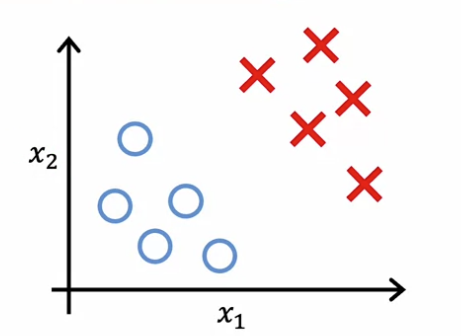(

Specifically, we are given $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), (x^{(3)}, y^{(3)}), \ldots, (x^{(m)}, y^{(m)})\}$
as our training data, with both the input features $x$ as well as the labels or target feature $y$.

In a classification problem, we could then use, say, logistic regression or a neural network
to learn the decision boundary between these two classes.

In contrast, in unsupervised learning, we are given a data set with just the $x$'s:

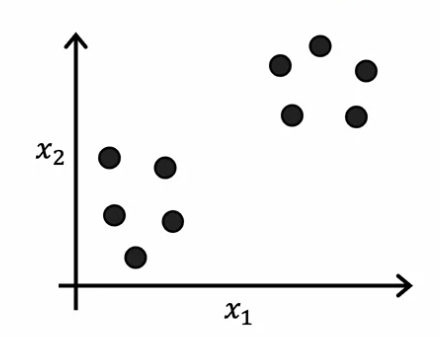

Here, we have a training set of just the $x$'s, no $y$'s:
$\{ x^{(1)}, x^{(2)}, x^{(3)}, \ldots, x^{(m)} \}$

That's why the plot above has no distinction between the points, they are all
just black because there are no classes or categories assigned to them.
In other words, we have no target features or labels, so there's nothing to predict.

Instead, we're going to ask the algorithm to find something interesting about the data, that is,
we want to find some interesting structure present in this data.

The first algorithm we will look at is one algorithm from a category of algorithms called
**clustering algorithms**.  Clustering algorithms try to see if the training data can be grouped into
clusters of examples that are all similar to each other in some way.  For instance, a clustering algorithm
might find the training data above can be organized into two clusters like this:

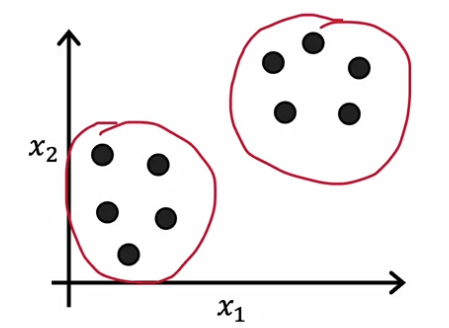

## Applications of clustering

- Clustering news articles together under common themes
- Marketing and sales (e.g., segmenting people into groups based on their purchasing tendencies)
- Music (segmenting music into genres or moods, or segmenting people based on listening tendencies)
- DNA analysis: look at the genetic expression data from different individuals and try to group the data into people that exhibit similar traits. 

## K-means intuition

Imagine we have this training data:

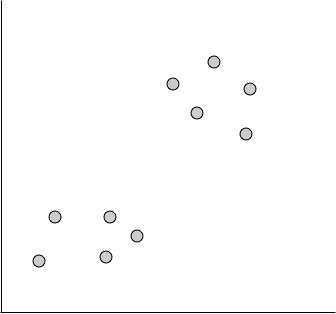

And we want to find 2 clusters from this data.

For the moment, we're going to ignore how we determined in advance that we wanted two clusters --- that's
an important problem, but for the moment we'll ignore how to determine the number of clusters.

First, we randomly pick two points, shown as a red star and a blue star that will form the centers
(or "centroids") of 
our clusters.  These are completely random choices (and not particularly good here).

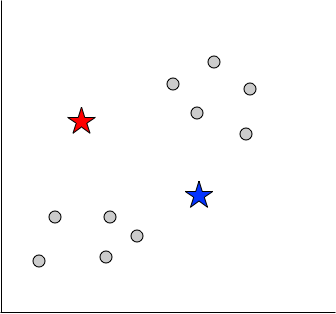

K-means repeatedly does two things:
1. Assign points to cluster centroids.
2. Move cluster centroids.

So the cluster centroids right now are the red and blue stars.  Step 1 of this algorithm
goes through all ten dots (our training set) and check if each dot is closer to the red star or the blue
star.  Each dot will get "assigned" to the closer centroid.  For the moment, let's visualize this
"assignment" as changing the color of a dot to either red or blue, depending on which star is closer.

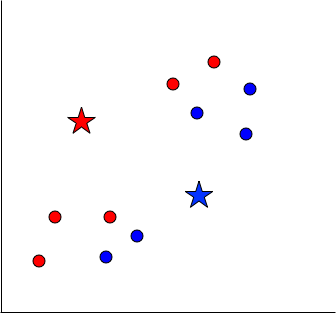

The second step is to move the cluster centroids to the **actual** centers of the clusters, based on the
current configurations of red/blue points:

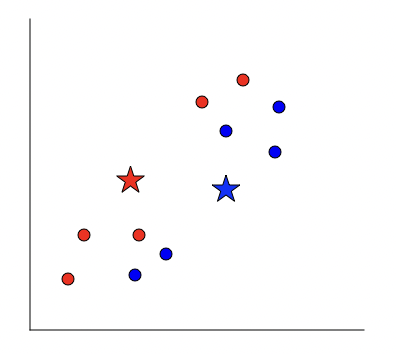

Then we repeat.  So imagine we reset all the points back to gray:

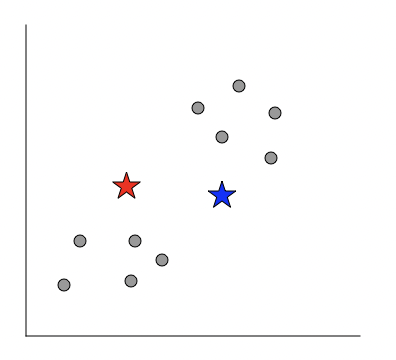

And then reassign them based on which star is closer now.

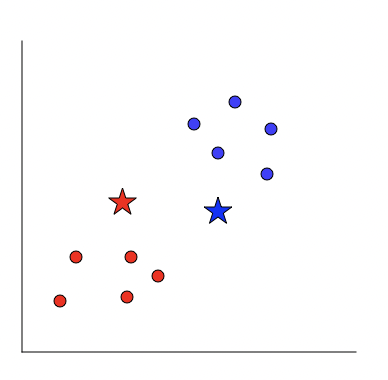

Then we move the centroids again.

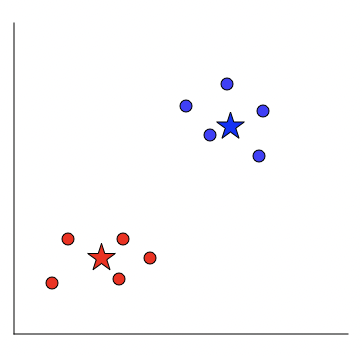

If you were to keep on repeating these two steps:
- look at each point and assign it to the nearest cluster centroid 
- move each cluster centroid to the mean of all the points with the same color. 

eventually, you will find that there are no more changes to the colors of the points or to the locations of the clusters centroids. And so this means that at this point the k-means clustering algorithm has converged. 

## Algorithm in detail

- Randomly initialize $K$ cluster centroids.  Call these $\mu_1, \mu_2, ..., \mu_K$.
  *(Note that these $\mu$'s are vectors of the same number of dimensions as the $x$ vectors).*
- Repeat:
  - Assign points to cluster centroids
  
    for i = 1 to m:
      - $c^{(i)}$ = index (from 1 to K) of cluster centroid closest to $x^{(i)}$
      
        *You will often see this written as $\min_{k} ||x^{(i)} - \mu_k||$
        The parallel lines refer to the distance function, and we want to find the $k$ that minimizes the
        distance between $x^{(i)}$ and $\mu_k$.*
        
        *People will often write this as minimizing the squared distance, $\min_{k} ||x^{(i)} - \mu_k||^2$,
        though they are the same here (squared distance and not-square distance).  The reason is that it avoids
        taking the square root, which is an expensive operation.*
        
    for i = 1 to K:
      - $\mu_k$ = mean of points assigned to cluster $k$.
      
        *Because each point is a vector, we can add up all the vectors together into one big mega-vector and
        divide by the total number of vectors to get the mean that we will assign to $\mu_k$.*
        
Note that the two steps in the "repeat" section are exactly the same two steps we described in the intuition section.

There is one problem that might occur.  It is possible that during this process, one (or more) of the clusters will be empty; that is,
during step 1, no points will be closest to one (or more) of the current cluster centroids.  The most common thing to do is
to eliminate that cluster if this happens.  A less common solution is to re-initialize that cluster centroid to a different
location, but unless you really need a certain number of clusters, the more common solution is to get rid of the empty cluster.

Though we normally think of clusters as corresponding to different geographic regions of our feature space, (and k-means
does very well at handling those situations), k-means also does well when the clusters are not well-defined and maybe the training
data forms a single amorphous blob:

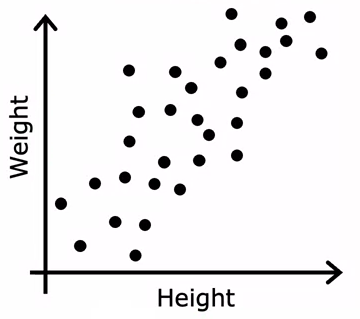

Here, if we asked k-means to find 3 clusters, it might find these:

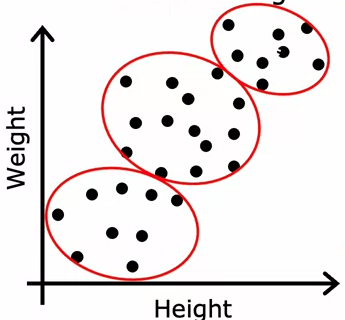

So k-means does just fine even with clusters that are not entirely separated from the other clusters.
  

## Random initialization

In truth, we don't normally initialize the starting locations of the centroids entirely 
randomly, as was implied above.

Normally, if we want $K$ clusters, we will initialize k-means by picking 
$K$ training examples and initializing the centroids to be located directly on top of
those points.  This makes sure that the starting centroids are somewhere in the vicinity of
at least a few of the data points.

## Sensitivity

Because of the random initialization, k-means is sensitive to starting locations of the centroids.
It's easy for the algorithm to get stuck in a local minimum:

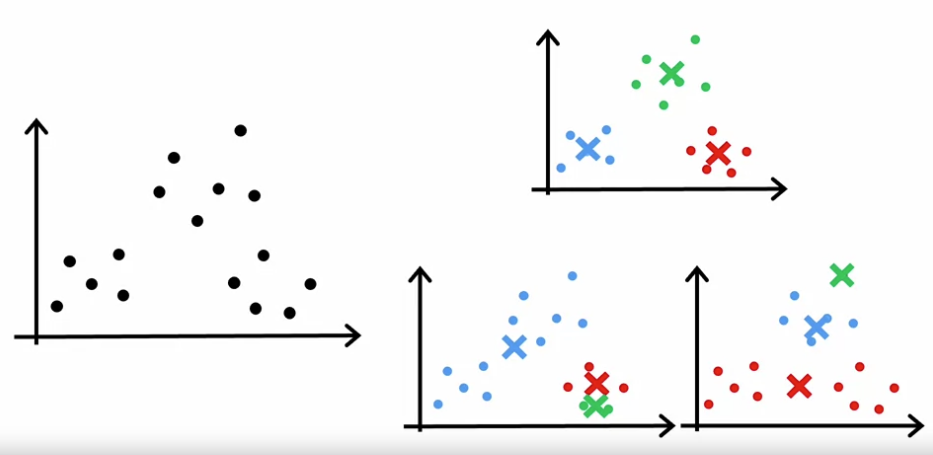

What we can do to mitigate this is to run k-means a bunch of different times,
record the final ending locations of the centroids, and pick which final
set of centroids are the best.

But how do we determine "best?"

This is done through a **cost function**!

## K-means cost function

Like most machine learning algorithms, there is a cost function that the algorithms
are trying to optimize.  Here we will explore this function.

Notation so far:

  - $c^{(i)}$ = index of cluster (1, 2, ... K) to which example $x^{(i)}$ is currently assigned.
  - $\mu_k$ = cluster centroid $k$.
  - (NEW): $\mu_{c^{(i)}}$ = cluster centroid of cluster to which example $x^{(i)}$ has been
  assigned.  
    - For example, if I want to know if $x^{(10)}$ has been assigned to the red or the blue cluster,
    I would look up $c^{(10)}$ and this would be either a 1 or a 2 (for red or blue).  
    $\mu_{c^{(10)}}$ would then be the centroid of this red or blue cluster.
    
**Cost function**:

$J(c^{(1)}, c^{(2)}, \ldots, c^{(m)}, \mu_1, \mu_2, \ldots, \mu_K) = \dfrac{1}{m}  \displaystyle \sum_{i=1}^m \lVert x^{(i)} - \mu_{c^{(i)}} \rVert ^2$

And we want to find the set of parameters (the $c$'s and the $\mu$'s) that minimize this cost
function $J$.

This cost function is sometimes called the **distortion** function.

Unlike minimizing previous cost functions, which were minimized with gradient descent,
this distortion function is minimized with the k-means training algorithm (doesn't have a fun 
name).  Note that our parameters here are the $c's$ and the $\mu$'s, and the two steps
of the training algorithm first update the $c$'s (to make $J$ smaller) and then update the $\mu$'s
(to also make $J$ smaller).

## Choosing the number of clusters

There are a few methods that we can use to choose how many clusters we want to use
for the k-means algorithm.  Sometimes we know ahead of time a good value of $k$ that makes sense,
given the training data, but often we don't.

### What doesn't work

A method that *doesn't* work is to choose the value of $k$ that minimizes the cost function
$J$.  This doesn't work because increasing the number of clusters pretty much always makes
the cost function $J$ smaller.  This is because as an extreme, imagine choosing the number of
clusters $k$ equal to the number of training data points.  Then there could be one cluster
per training data point, with each cluster centroid located directly on top of each training data
point.  And this would lead to a cost of zero.

### Elbow method

We can plot the number of clusters versus the cost function $J$.  We run k-means a number of times,
with different number of clusters:

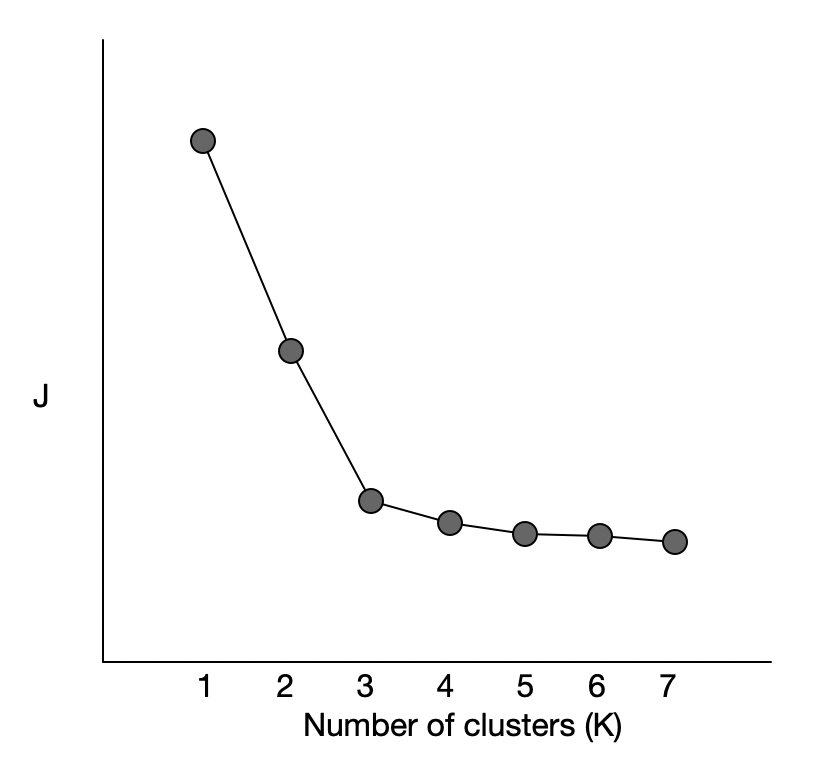

What you will sometimes notice is there is a spot where increasing the number of clusters
still decreases $J$, but at a much slower rate than before.  This is called the "elbow," and
is often a good spot for picking the number of clusters.

However, in many situations, there is no elbow, and the cost function keeps decreasing smoothly
as you increase the number of clusters.

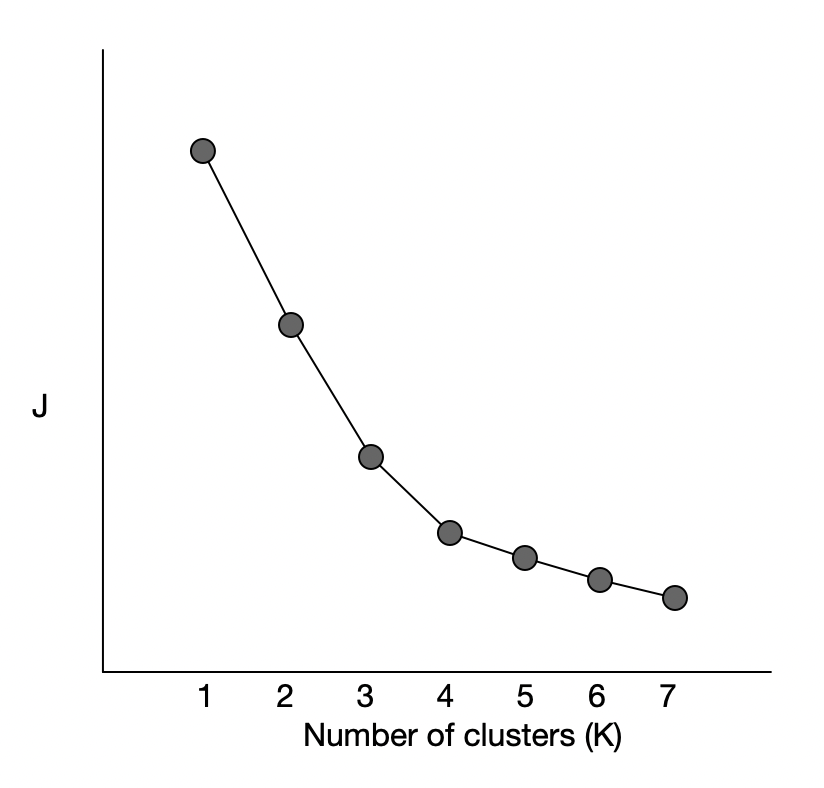

So a different method entirely, where the cost $J$ keeps decreasing and there's no elbow,
is to evaluate your clusters based on some real-world performance measure.

For instance, if we are selling t-shirts, and we wanted to figure out if we should make 3 sizes of shirts,
or 5, or 7, we could look at the trade-off between making more sizes of shirts with better fits
(probably more expensive) versus fewer sizes of shirts with less-optimized fits (probably cheaper).
But maybe more people will buy the shirts if they fit better, even at higher prices.